<img src="../gfx/lpqc_title.jpg" alt="Title" style="display: block; margin: auto; width: 100%;" />

# 🐓 Clustering & Visualisations 

**"La Poule Qui Chante"** 🐓, une entreprise française d'agroalimentaire dont l'activité principale est l'élevage et la vente de poulets sous le label "Poulet Agriculture Biologique", souhaite se développer à l'international.

L'objectif de cette étude est de proposer une **analyse des groupements de pays cibles pour l'export du poulet**.

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 1 - Importation des librairies et chargement des données

***

### 1.1 - Importation des librairies

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from adjustText import adjust_text

import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [2]:
sns.set_theme(style="darkgrid")

### 1.2 - Chargement des données

In [3]:
df = pd.read_csv('../data/df_merge.csv')
df.set_index('Pays', inplace=True)
df.head()

,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,,,
Fédération de Russie,Europe,Eastern Europe,145734038.0,259000.0,52000.0,4953000.0,5308000.0,-0.92,6.694459,44120.144531,12810.0,0.0,3530.0
Indonésie,Asia,South-eastern Asia,267670543.0,1000.0,0.0,4077000.0,4083000.0,-0.44,3.670131,15415.605793,4520.0,689.0,11695.0
Mexique,Americas,Latin America and the Caribbean,126190788.0,8000.0,1158000.0,4950000.0,3800000.0,-0.69,5.527961,25351.440407,10720.0,393.0,11767.0
Pologne,Europe,Eastern Europe,37921592.0,1513000.0,78000.0,1177000.0,2734000.0,0.50,11.528913,49338.284441,19110.0,315.0,5014.0
Égypte,Africa,Northern Africa,98423598.0,3000.0,20000.0,2642000.0,2626000.0,-1.03,33.884776,18524.557220,4040.0,164.0,2026.0


### 1.3 - Contrôle des données

In [4]:
# Dimensions du jeu de données
df.shape

(118, 13)

In [5]:
# Types des variables
df.dtypes

Region                  object
Sub-region              object
Population             float64
Exportations           float64
Importations           float64
Consommation           float64
Production             float64
Stabilité Politique    float64
Inflation              float64
Activité économique    float64
Revenu                 float64
KFC                    float64
Distance               float64
dtype: object

In [6]:
# Vérification des valeurs manquantes
df.isna().sum()

Region                 0
Sub-region             0
Population             0
Exportations           0
Importations           0
Consommation           0
Production             0
Stabilité Politique    0
Inflation              0
Activité économique    0
Revenu                 0
KFC                    0
Distance               0
dtype: int64

### 1.4 - Analyses descriptives univariées

In [7]:
# Analyse descriptive
df.describe()

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
count,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,2.048724e+07,7.242373e+04,9.956780e+04,5.081356e+05,4.990424e+05,0.226525,8.891120,35835.851747,20589.745763,77.864407,7363.855932
std,3.897183e+07,2.253724e+05,2.028280e+05,9.277828e+05,9.034874e+05,0.783475,22.176519,27169.028326,22074.705115,195.476403,5181.464761
min,1.067000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.470000,-1.035301,3460.933714,2690.000000,0.000000,0.000000
25%,1.208745e+06,0.000000e+00,5.000000e+03,2.800000e+04,9.250000e+03,-0.350000,3.345084,15162.653028,5452.500000,0.000000,3387.750000
50%,5.487795e+06,2.000000e+03,2.300000e+04,1.380000e+05,1.155000e+05,0.425000,5.080792,27434.001825,10525.000000,7.500000,6739.000000
75%,1.805168e+07,3.400000e+04,9.375000e+04,4.947500e+05,4.825000e+05,0.870000,8.575733,51197.498950,26982.500000,38.250000,10606.250000
max,2.676705e+08,1.513000e+06,1.163000e+06,4.953000e+06,5.308000e+06,1.310000,221.341644,143809.505845,95480.000000,1131.000000,19819.000000


In [8]:
# Description des variables qualitatives
df.describe(include='object')

,Region,Sub-region
count,118,118
unique,5,17
top,Europe,Latin America and the Caribbean
freq,37,28


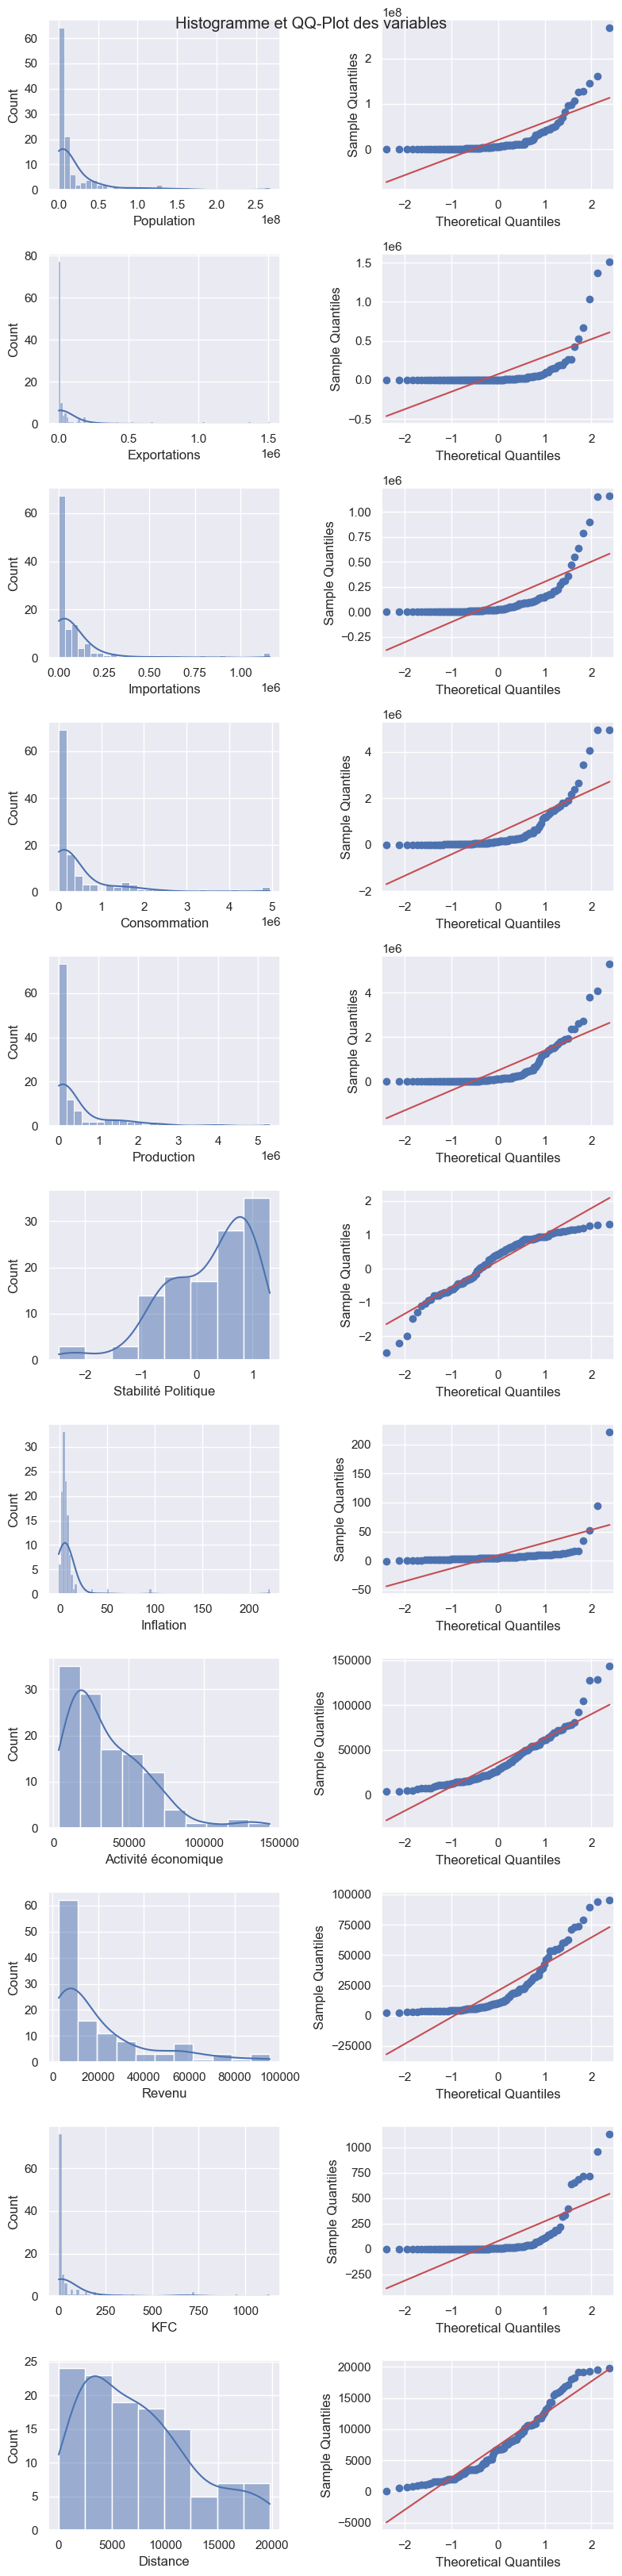

In [9]:
# Analyse de la normalité

# Sélection des variables quantitatives
df_num = df.select_dtypes(include='number')
indicateurs = df_num.columns

# Affichage d'un histogramme pour chaque variable
fig, axs = plt.subplots(nrows=len(indicateurs), ncols=2, figsize=(8, 3*len(indicateurs)))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Histogramme et QQ-Plot des variables')

for row in range(len(indicateurs)):
    for col in range(2):
        ax = axs[row, col]
        var = indicateurs[row]
        if col == 0:
            sns.histplot(x=var, data=df, kde=True, ax=ax)
        else:
            qqplot(data=df[var], line='s', ax=ax)

plt.tight_layout()
plt.show()

Aucune des variables ne suit une loi normale.

### 1.5 - Analyses bivariées

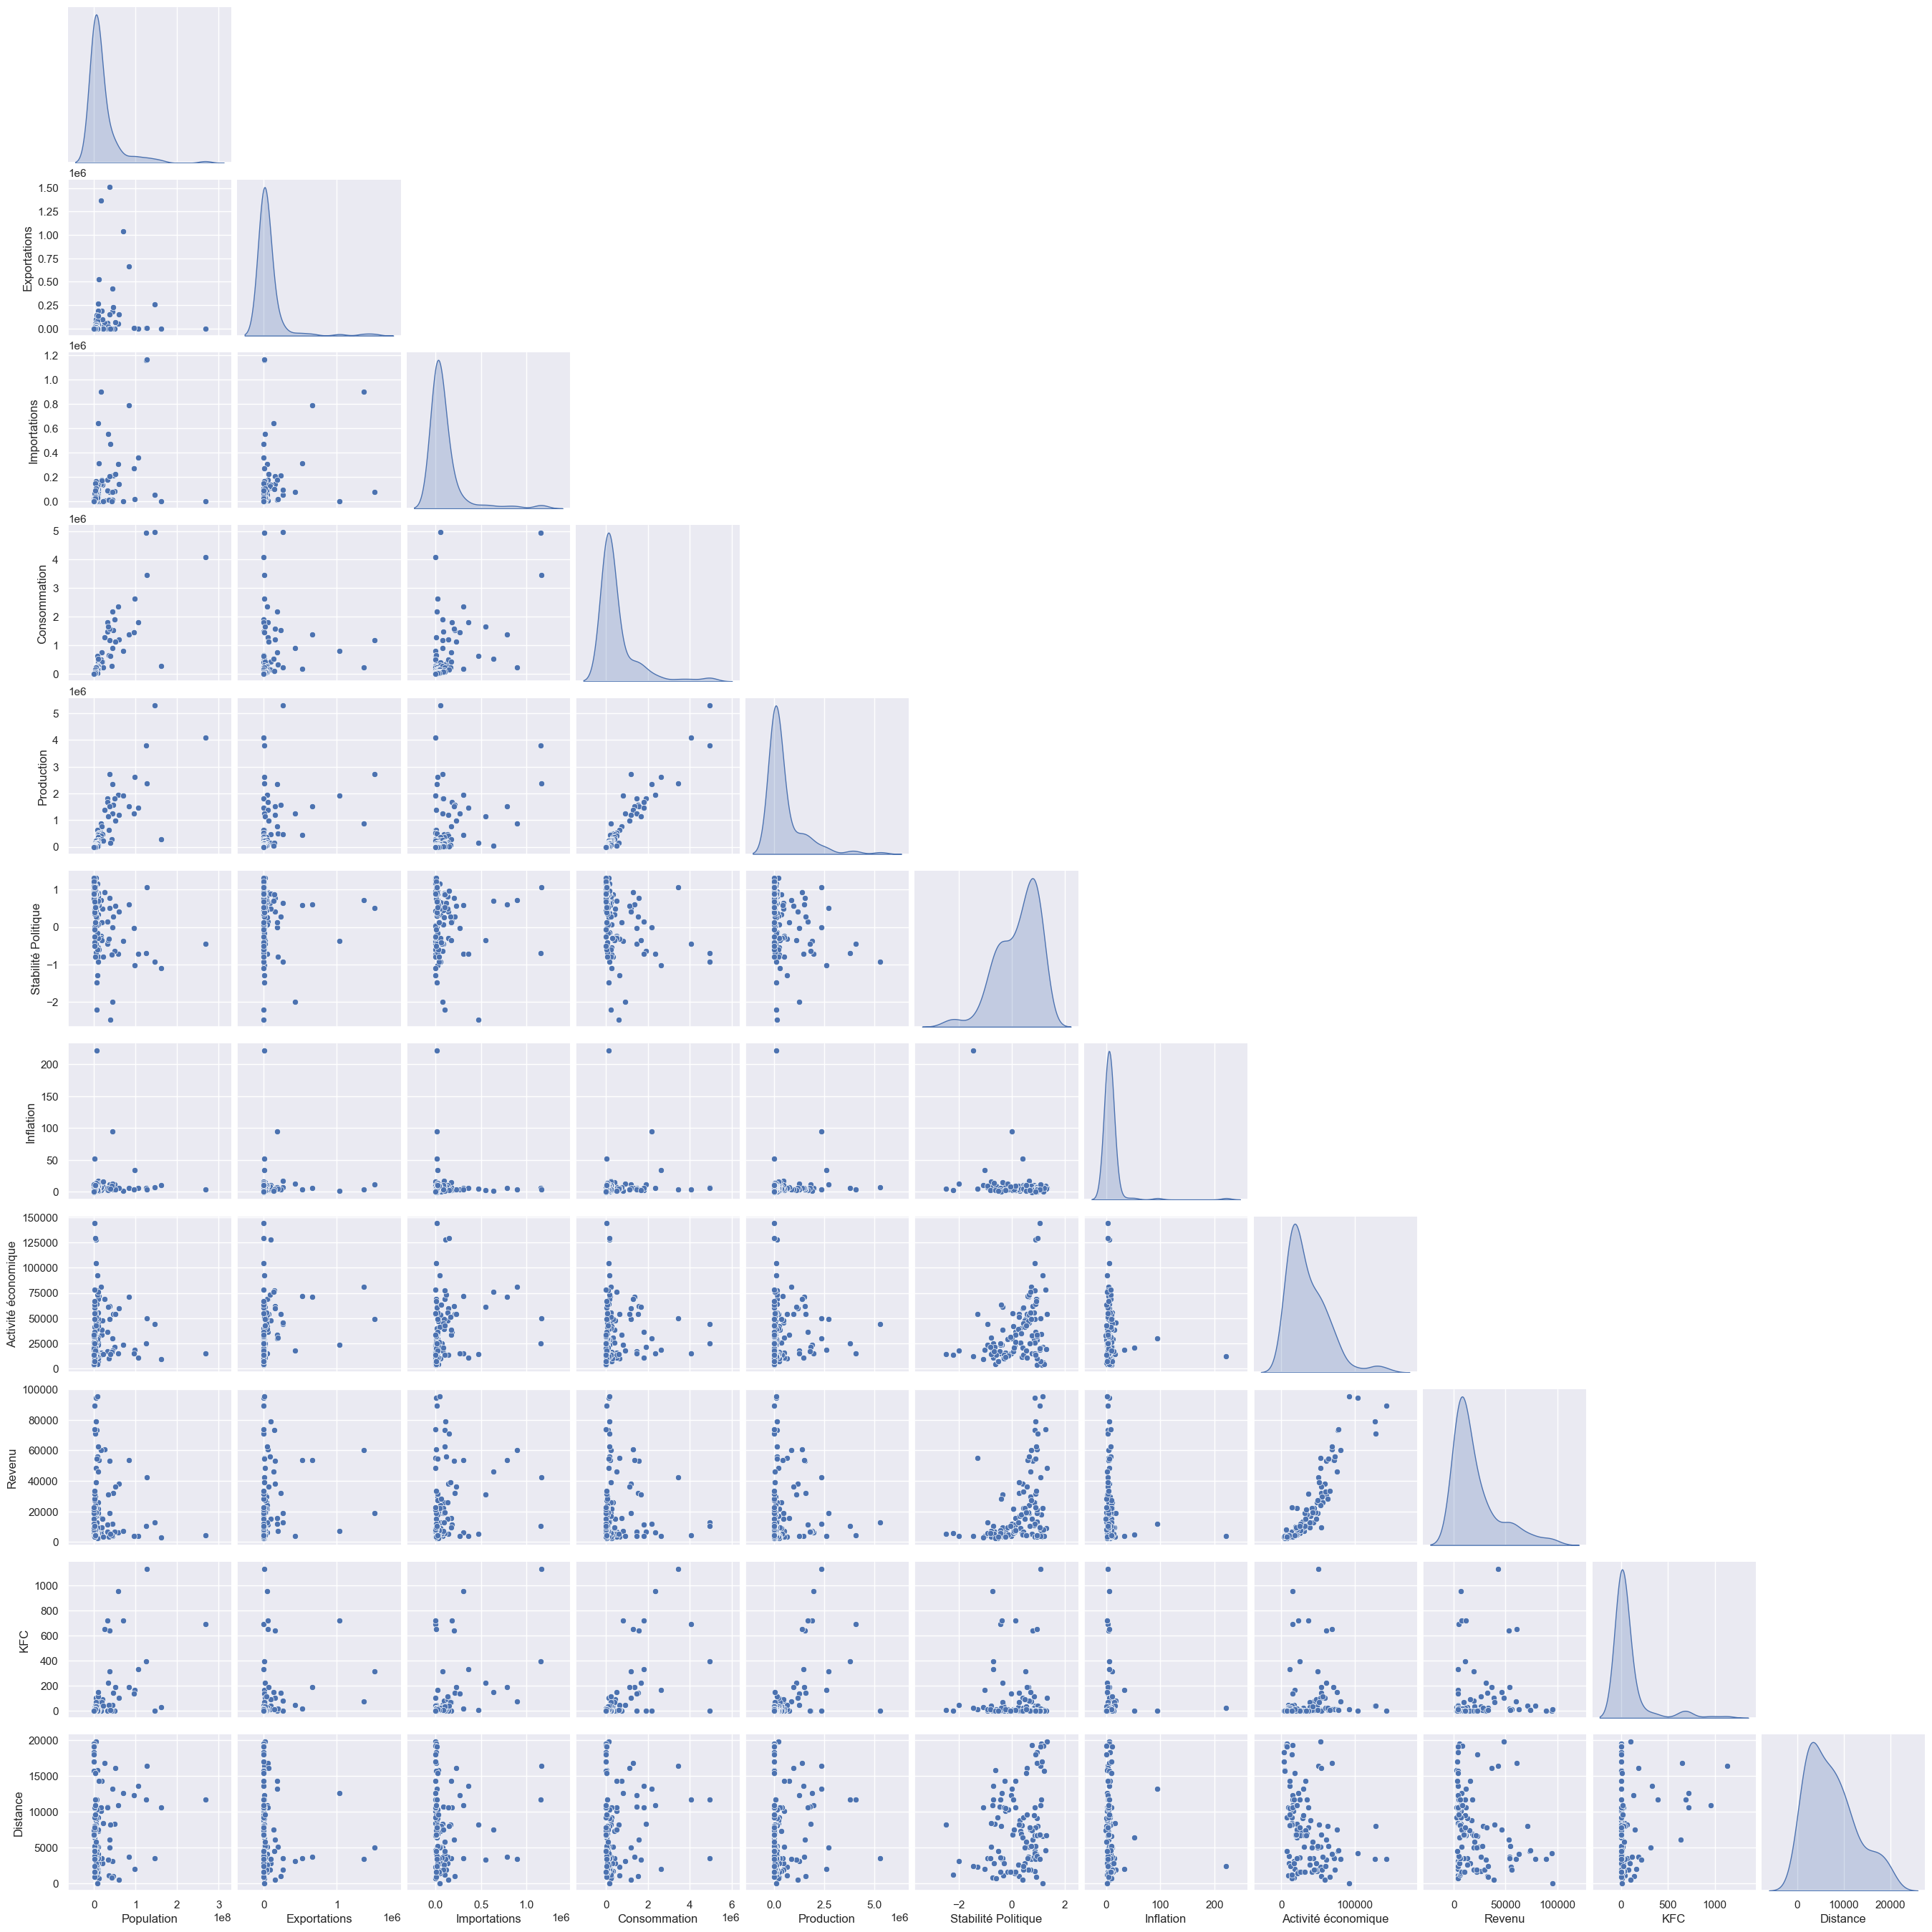

In [10]:
# Relation entre les variables quantitatives
sns.pairplot(df_num, diag_kind='kde', corner=True)
plt.show()

Etant donné qu'aucune de nos variables quantitatives ne suit une loi normale, nous allons calculer le **coefficient de Spearman** au lieu de celui de Pearson.

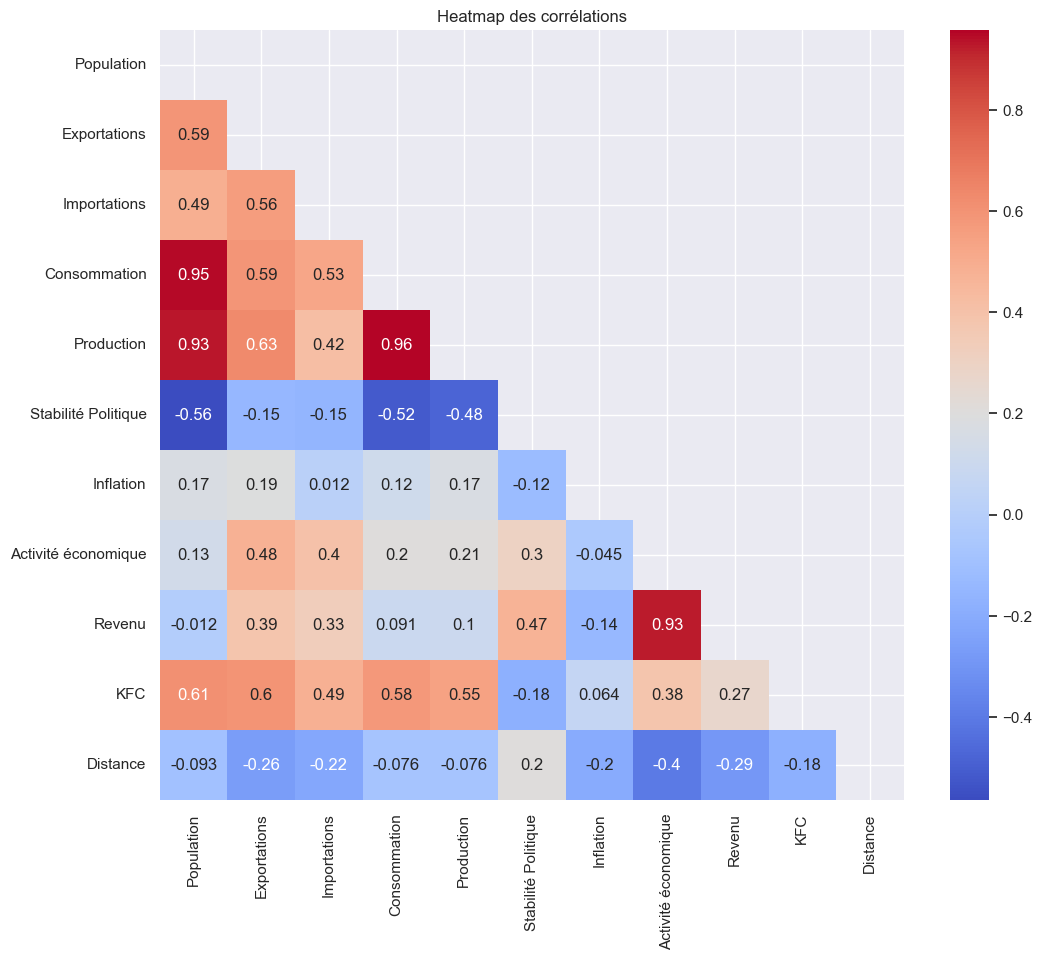

In [11]:
# Tableau des corrélations
correlation = df_num.corr(method='spearman')

# Heatmap des corrélations
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', mask=mask)
plt.title("Heatmap des corrélations")
plt.show()

Les corrélations fortes :
- Les différentes corrélations entre Exportations, Importations, Population, Consommation, Production
- Revenu/Activité économique

Les corrélations moyennes :
- KFC avec Population, Exportations, Importations, Consommation, Production
- Les corrélations négatives entre la Stabilité Politique et Population, Consommation et Production

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 2 - Analyse en Composantes Principales

***

### 2.1 - Séparation des données

In [12]:
Pays = df.index
df_acp = df.drop(columns=['Region', 'Sub-region'])
X = df_acp.values
Indicateurs = df_acp.columns

### 2.2 - Scaling

In [13]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 3.22748242,  0.83138795, -0.23552291,  4.81127627,  5.34535968,
        -1.46962524, -0.09947588,  0.30621708, -0.35393097, -0.40003014,
        -0.74307271],
       [ 6.36966195, -0.3182657 , -0.49299104,  3.86306331,  3.9837204 ,
        -0.85435749, -0.23643265, -0.75480529, -0.7310754 ,  3.13972284,
         0.83945642],
       [ 2.72387277, -0.28707355,  5.24062605,  4.80802896,  3.66915394,
        -1.17480944, -0.15230079, -0.38754132, -0.44901322,  1.61901619,
         0.85341136],
       [ 0.44926551,  6.41923941, -0.10678885,  0.72400216,  2.48424988,
         0.35054185,  0.11945252,  0.49909818, -0.0673194 ,  1.21828944,
        -0.45544586],
       [ 2.00834057, -0.30935366, -0.39396483,  2.30976926,  2.36420331,
        -1.6106241 ,  1.13183854, -0.63988733, -0.75291247,  0.44252354,
        -1.03457593]])

In [14]:
# On espère avoir une moyenne à 0 et un écart-type à 1
pd.DataFrame(X_scaled).describe().round(2).loc[["mean", "std"],:]

,0,1,2,3,4,5,6,7,8,9,10
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 2.3 - ACP

In [15]:
# Instanciation sur l'ensemble des variables
pca = PCA()

# On l'entraine sur les données scalées
X_pca = pca.fit_transform(X_scaled)

# Nombre de composantes calculées
n_comp = pca.n_components_
n_comp

11

### 2.4 - Variance expliquée

In [16]:
# Valeurs corrigées
eigval = (n_comp-1)/n_comp*pca.explained_variance_
# Proportion de variance expliquée
scree = np.round(pca.explained_variance_ratio_*100, decimals=1)
# Cumul de variance expliquée
scree_cum = np.cumsum(scree)
# Liste des composantes
c_list = ["F"+str(i) for i in range(1,n_comp+1)]

In [17]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        'Dimensions': c_list,
        'Valeurs propres': pca.explained_variance_,
        'Valeurs propres corrigées': eigval,
        'Proportion de variance': scree,
        'Proportion de variance cumulée': scree_cum
    },
    columns=['Dimensions', 'Valeurs propres', 'Valeurs propres corrigées', 'Proportion de variance', 'Proportion de variance cumulée']
)
comp

,Dimensions,Valeurs propres,Valeurs propres corrigées,Proportion de variance,Proportion de variance cumulée
0,F1,3.758449,3.416772,33.9,33.9
1,F2,2.452492,2.229538,22.1,56.0
2,F3,1.403261,1.275692,12.6,68.6
3,F4,0.885702,0.805184,8.0,76.6
4,F5,0.881624,0.801476,7.9,84.5
5,F6,0.639473,0.581339,5.8,90.3
6,F7,0.426146,0.387406,3.8,94.1
7,F8,0.363233,0.330212,3.3,97.4
8,F9,0.210725,0.191568,1.9,99.3
9,F10,0.071764,0.065240,0.6,99.9


La 1ère composante capte 34% de la variance de données, la 2ème 22%,...

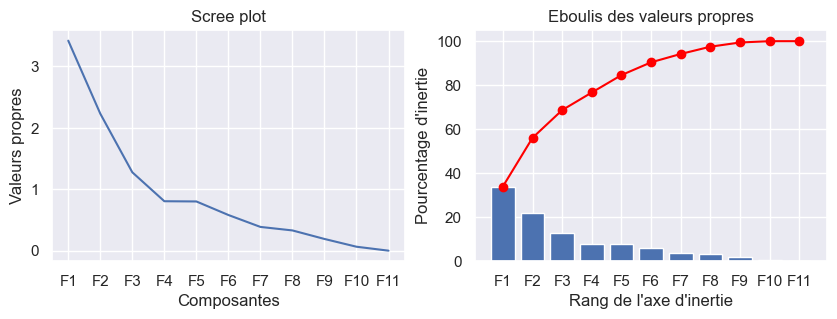

In [18]:
# Scree plot et Eboulis des Valeurs Propres
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(c_list, eigval)
ax1.set_title('Scree plot')
ax1.set_xlabel('Composantes')
ax1.set_ylabel('Valeurs propres')

ax2.bar(c_list, scree)
ax2.plot(c_list, scree_cum, c='red', marker='o')
ax2.set_title('Eboulis des valeurs propres')
ax2.set_xlabel("Rang de l'axe d'inertie")
ax2.set_ylabel("Pourcentage d'inertie")

plt.show()

On observe une cassure au niveau de la composante F4.

> En bleu est présenté la variance de chaque nouvelle composante, et en rouge la variance cumulée.

> Près de **80%** de la variance est comprise dans les 4 premières composantes. 

> On passe de 11 variables à 4 en conservant 80% de la variance.

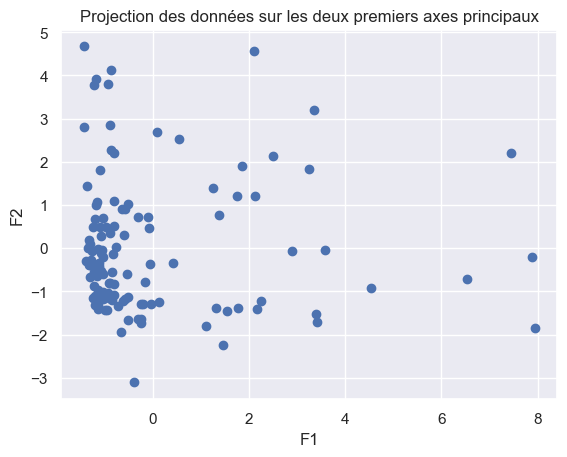

In [19]:
# Visualisation des données projetées
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Projection des données sur les deux premiers axes principaux')
plt.show()

In [20]:
# ACP à 4 composantes
n_comp = 4
c_list = ["F"+str(i) for i in range(1,n_comp+1)]
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(X_scaled)

### 2.5 - Contribution

In [21]:
# Qualité de représentation des variables
# Calcul du cosinus carré des variables
cos_squared = np.round(np.square(pca.components_), 4)

# Création d'un DataFrame avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=Indicateurs, index=c_list)
df_cos_squared

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
F1,0.2064,0.0316,0.1019,0.2395,0.2331,0.0313,0.0002,0.0000,0.0002,0.1507,0.0049
F2,0.0060,0.0472,0.0462,0.0007,0.0002,0.1142,0.0225,0.3615,0.3573,0.0080,0.0363
F3,0.0002,0.0222,0.0030,0.0000,0.0036,0.2417,0.1867,0.0184,0.0013,0.0556,0.4673
F4,0.0185,0.5936,0.0236,0.0392,0.0008,0.0103,0.2041,0.0373,0.0601,0.0035,0.0090


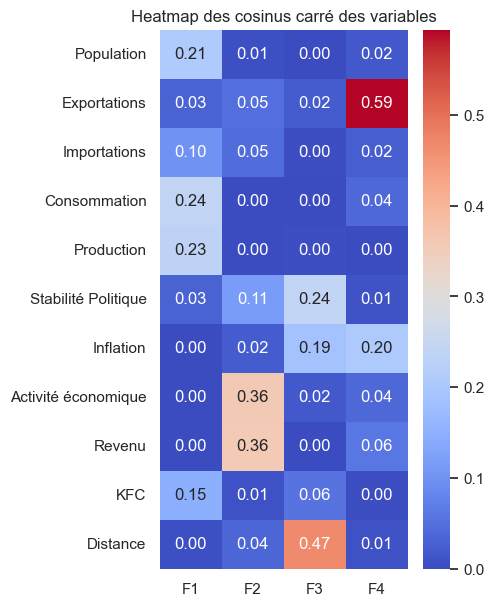

In [22]:
# Heatmap des cosinus carré
plt.figure(figsize=(4,7))
sns.heatmap(df_cos_squared.T, annot=True, cmap='coolwarm', fmt="0.2f")
plt.title("Heatmap des cosinus carré des variables")
plt.show()

L'axe principal F4 représente bien la variable Exportations.

In [23]:
# Contribution des variables à la formation des axes
pcs = pca.components_
pcs = pd.DataFrame(pcs, columns=Indicateurs, index=c_list)
pcs

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
F1,0.454366,0.177724,0.319275,0.489347,0.482833,-0.176899,0.014955,-0.005197,-0.015787,0.388241,0.070125
F2,-0.077281,0.217274,0.214883,-0.026631,-0.012360,0.337932,-0.149895,0.601275,0.597713,0.089713,-0.190462
F3,-0.012829,-0.148986,0.054581,-0.006863,-0.060243,0.491632,-0.432108,-0.135545,-0.036211,0.235796,0.683579
F4,-0.135906,0.770431,0.153764,-0.198040,-0.028759,-0.101719,-0.451739,-0.193129,-0.245146,-0.059083,-0.094736


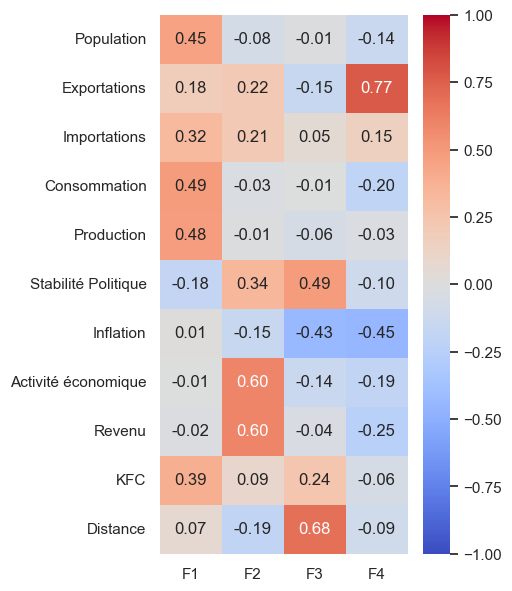

In [24]:
fig, ax = plt.subplots(figsize=(4, 7))
sns.heatmap(pcs.T, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt="0.2f")
plt.show()

### 2.6 - Cercles des corrélations

In [25]:
def correlation_graph(pca,
                      x_y,
                      features):
    """Affiche le cercle des corrélations
    Arguments:
    ----------
    pca : sklearn.decomposition.PCA, notre objet PCA qui a été fit
    x_y : list ou tuple, le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple, la liste des features à représenter
    """

    # Extrait x et y
    x,y = x_y

    # Taille de l'image
    fig, ax = plt.subplots(figsize=(8, 7))

    # Etiquettes
    labels = []

    # Pour chaque composante
    for i in range(0, pca.components_.shape[1]):

        # Affichage des flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02)
        
        # Affichage des noms de variables
        labels.append(plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i], horizontalalignment='center'))

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphique
    plt.title("Cercle des corrélations (F{} et F{}, {}%)".format(x+1, y+1, round(100*(pca.explained_variance_ratio_[x]+pca.explained_variance_ratio_[y]),1)))

    # Cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    #adjust_text(labels, arrowprops=dict(arrowstyle="->", color='r', lw=1))
    adjust_text(labels)

    # Axes et affichage
    plt.axis('equal')
    plt.show(block=False)

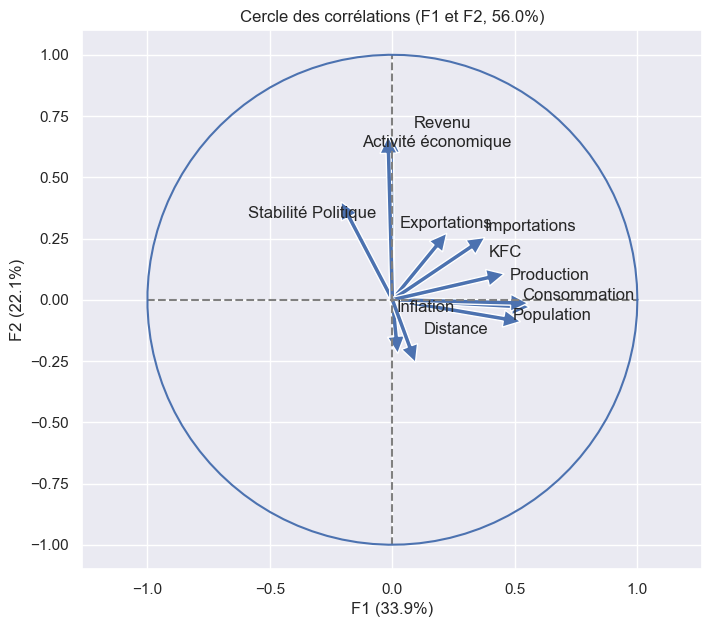

In [26]:
correlation_graph(pca, (0,1), Indicateurs)

Les variables les plus corrélées positivement à F1 sont :
- Consommation
- Production
- Population
- KFC

Les variables les plus corrélées positivement à F2 sont :
- Revenu
- Activité économique

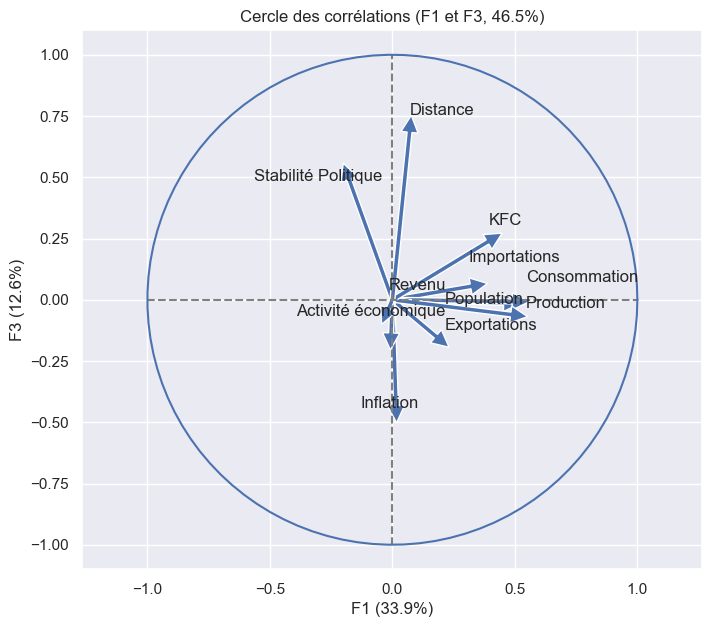

In [27]:
correlation_graph(pca, (0,2), Indicateurs)

Corrélations positives à F3 :
- Distance
- Stabilité politique

Corrélation négative à F3 :
- Inflation

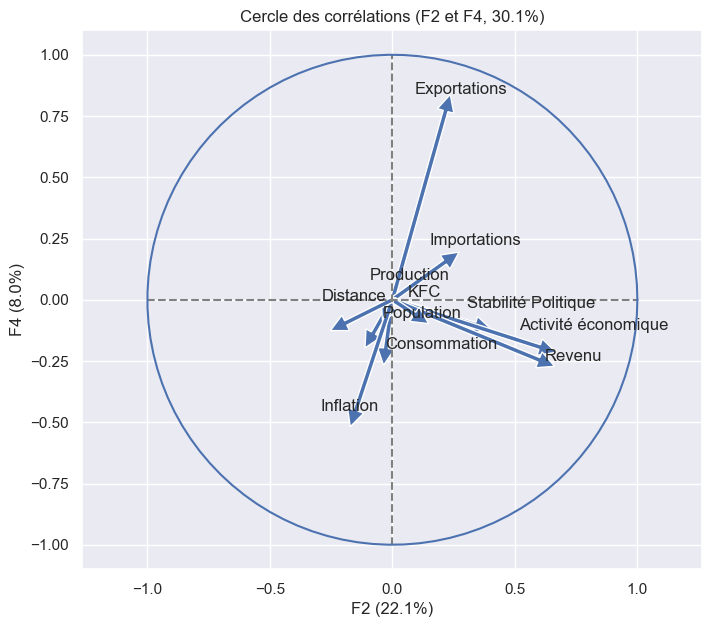

In [28]:
correlation_graph(pca, (1,3), Indicateurs)

Corrélations positives à F4 :
- Exportations

Corrélation négative à F4 :
- Inflation

Pour résumer :

> ***F1 :*** Quantité de volailles consommée

> ***F2 :*** Economie

> ***F3 :*** Distance et stabilité

> ***F4 :*** Exportations

### 2.7 - Projections des individus

In [29]:
X_proj = pca.transform(X_scaled)

In [30]:
def display_factorial_planes(X_projected,
                             x_y,
                             pca=None,
                             labels=None,
                             clusters=None,
                             alpha=1,
                             figsize=[10,8],
                             marker="."):
    """Affiche le nuage des individus dans les plans factoriels
    Arguments:
    ----------
    X_projected : numpy.array, les individus projetés
    x_y : list ou tuple, le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    pca : sklearn.decomposition.PCA, notre objet PCA qui a été fit
    labels : list, les labels à afficher
    clusters : list, les clusters à afficher
    alpha : float, la transparence des points
    figsize : list, la taille de l'image
    marker : str, la forme des points
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été définie
    if not figsize:
        figsize = [7,6]

    # On gère les labels
    if labels is None:
        labels = []
    try:
        len(labels)
    except Exception as e:
        raise e
    
    # On vérifie la variable axis
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("La variable axis n'est pas bonne")
    
    # On définit x et y
    x,y = x_y

    # On crée la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters
    c = None if clusters is None else clusters

    # On affiche les points
    if c is None:
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100)
    else:
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100, palette='viridis')

    # Si la variable pca a été fournie, on peut calculer le % de la variance de chaque axe
    if pca:
        v1 = str(round(100*pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y])) + " %"
    else:
        v1 = v2 = ""

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}', fontsize=18)
    ax.set_ylabel(f'F{y+1} {v2}', fontsize=18)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels
    labs = []
    if len(labels):
        for i,(_x, _y) in enumerate(X_[:, [x,y]]):
            labs.append(plt.text(_x, _y+0.25, labels[i], fontsize='16', ha='center', va='center'))

    # Titre et affichage
    plt.title("Projection des individus (F{} et F{}, {}%)".format(x+1, y+1, round(100*(pca.explained_variance_ratio_[x]+pca.explained_variance_ratio_[y]),1)))
    plt.show()

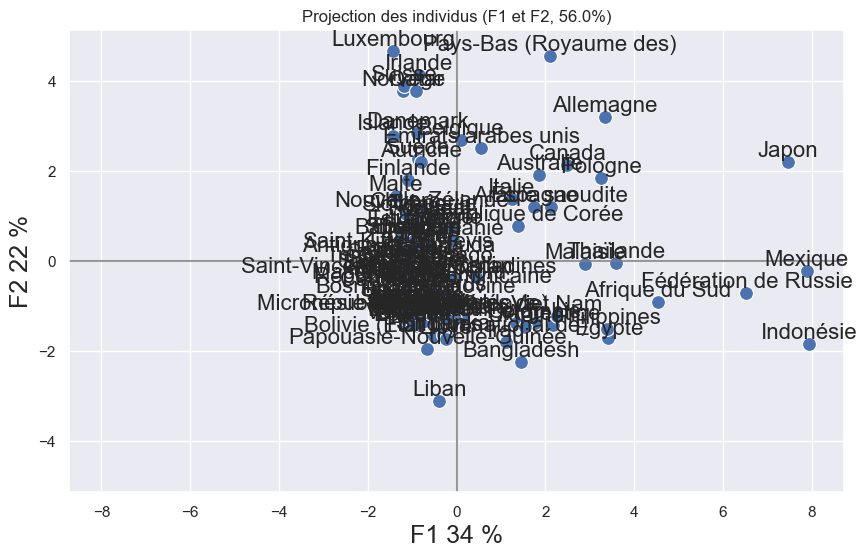

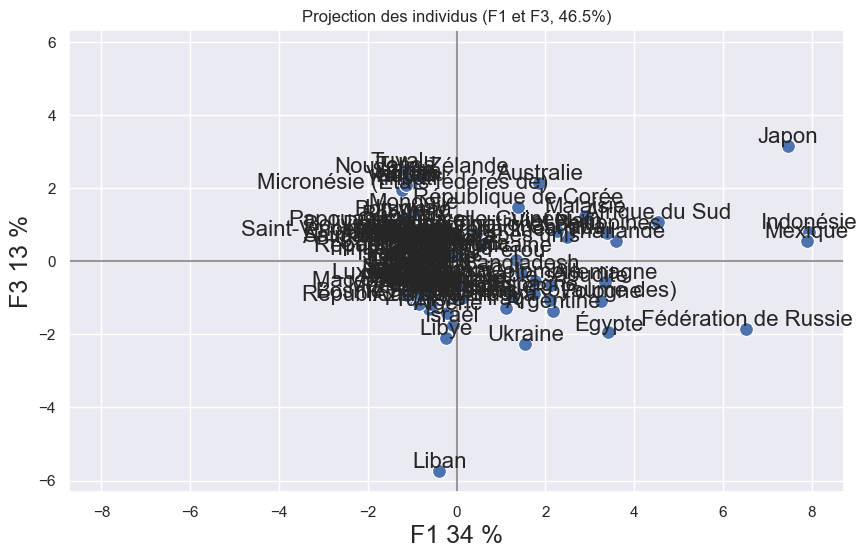

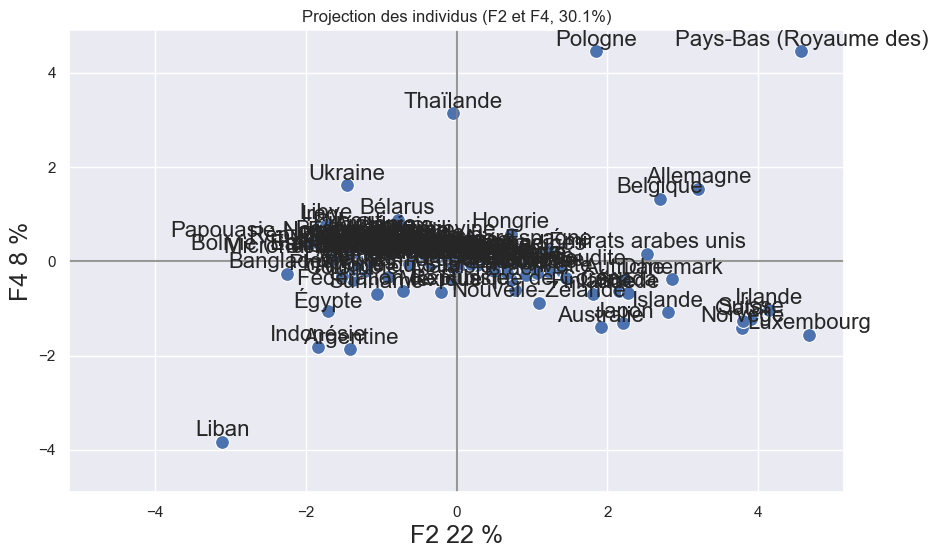

In [31]:
plans = [(0,1), (0,2), (1,3)]
for plan in plans:
    display_factorial_planes(X_proj, plan, pca=pca, labels=Pays, figsize=(10,6), marker="o")

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 3 - Classification ascendante hiérarchique

***

La classification ascendante hiérarchique est une méthode de classification non supervisée qui permet de regrouper des observations en fonction de leurs similarités. Elle est basée sur la construction d'une hiérarchie de partitions emboîtées les unes dans les autres.

Les différentes étapes :
1. Calcul d'un indice de dissimilarité entre les observations
2. Mise en place d'une stratégie d'agrégation pour générer des clusters d'invididus
3. Construction d'un dendrogramme

La construction des clusters est basée sur l'inertie intra et inter-cluster :
- Inertie intra-cluster : mesure de similarité entre les observations d'un cluster
- Inertie inter-cluster : mesure de dissimilarité entre les clusters

### 3.1 - Préparation des données pour la classification

In [32]:
X = df_acp.values
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, method='ward', metric='euclidean')

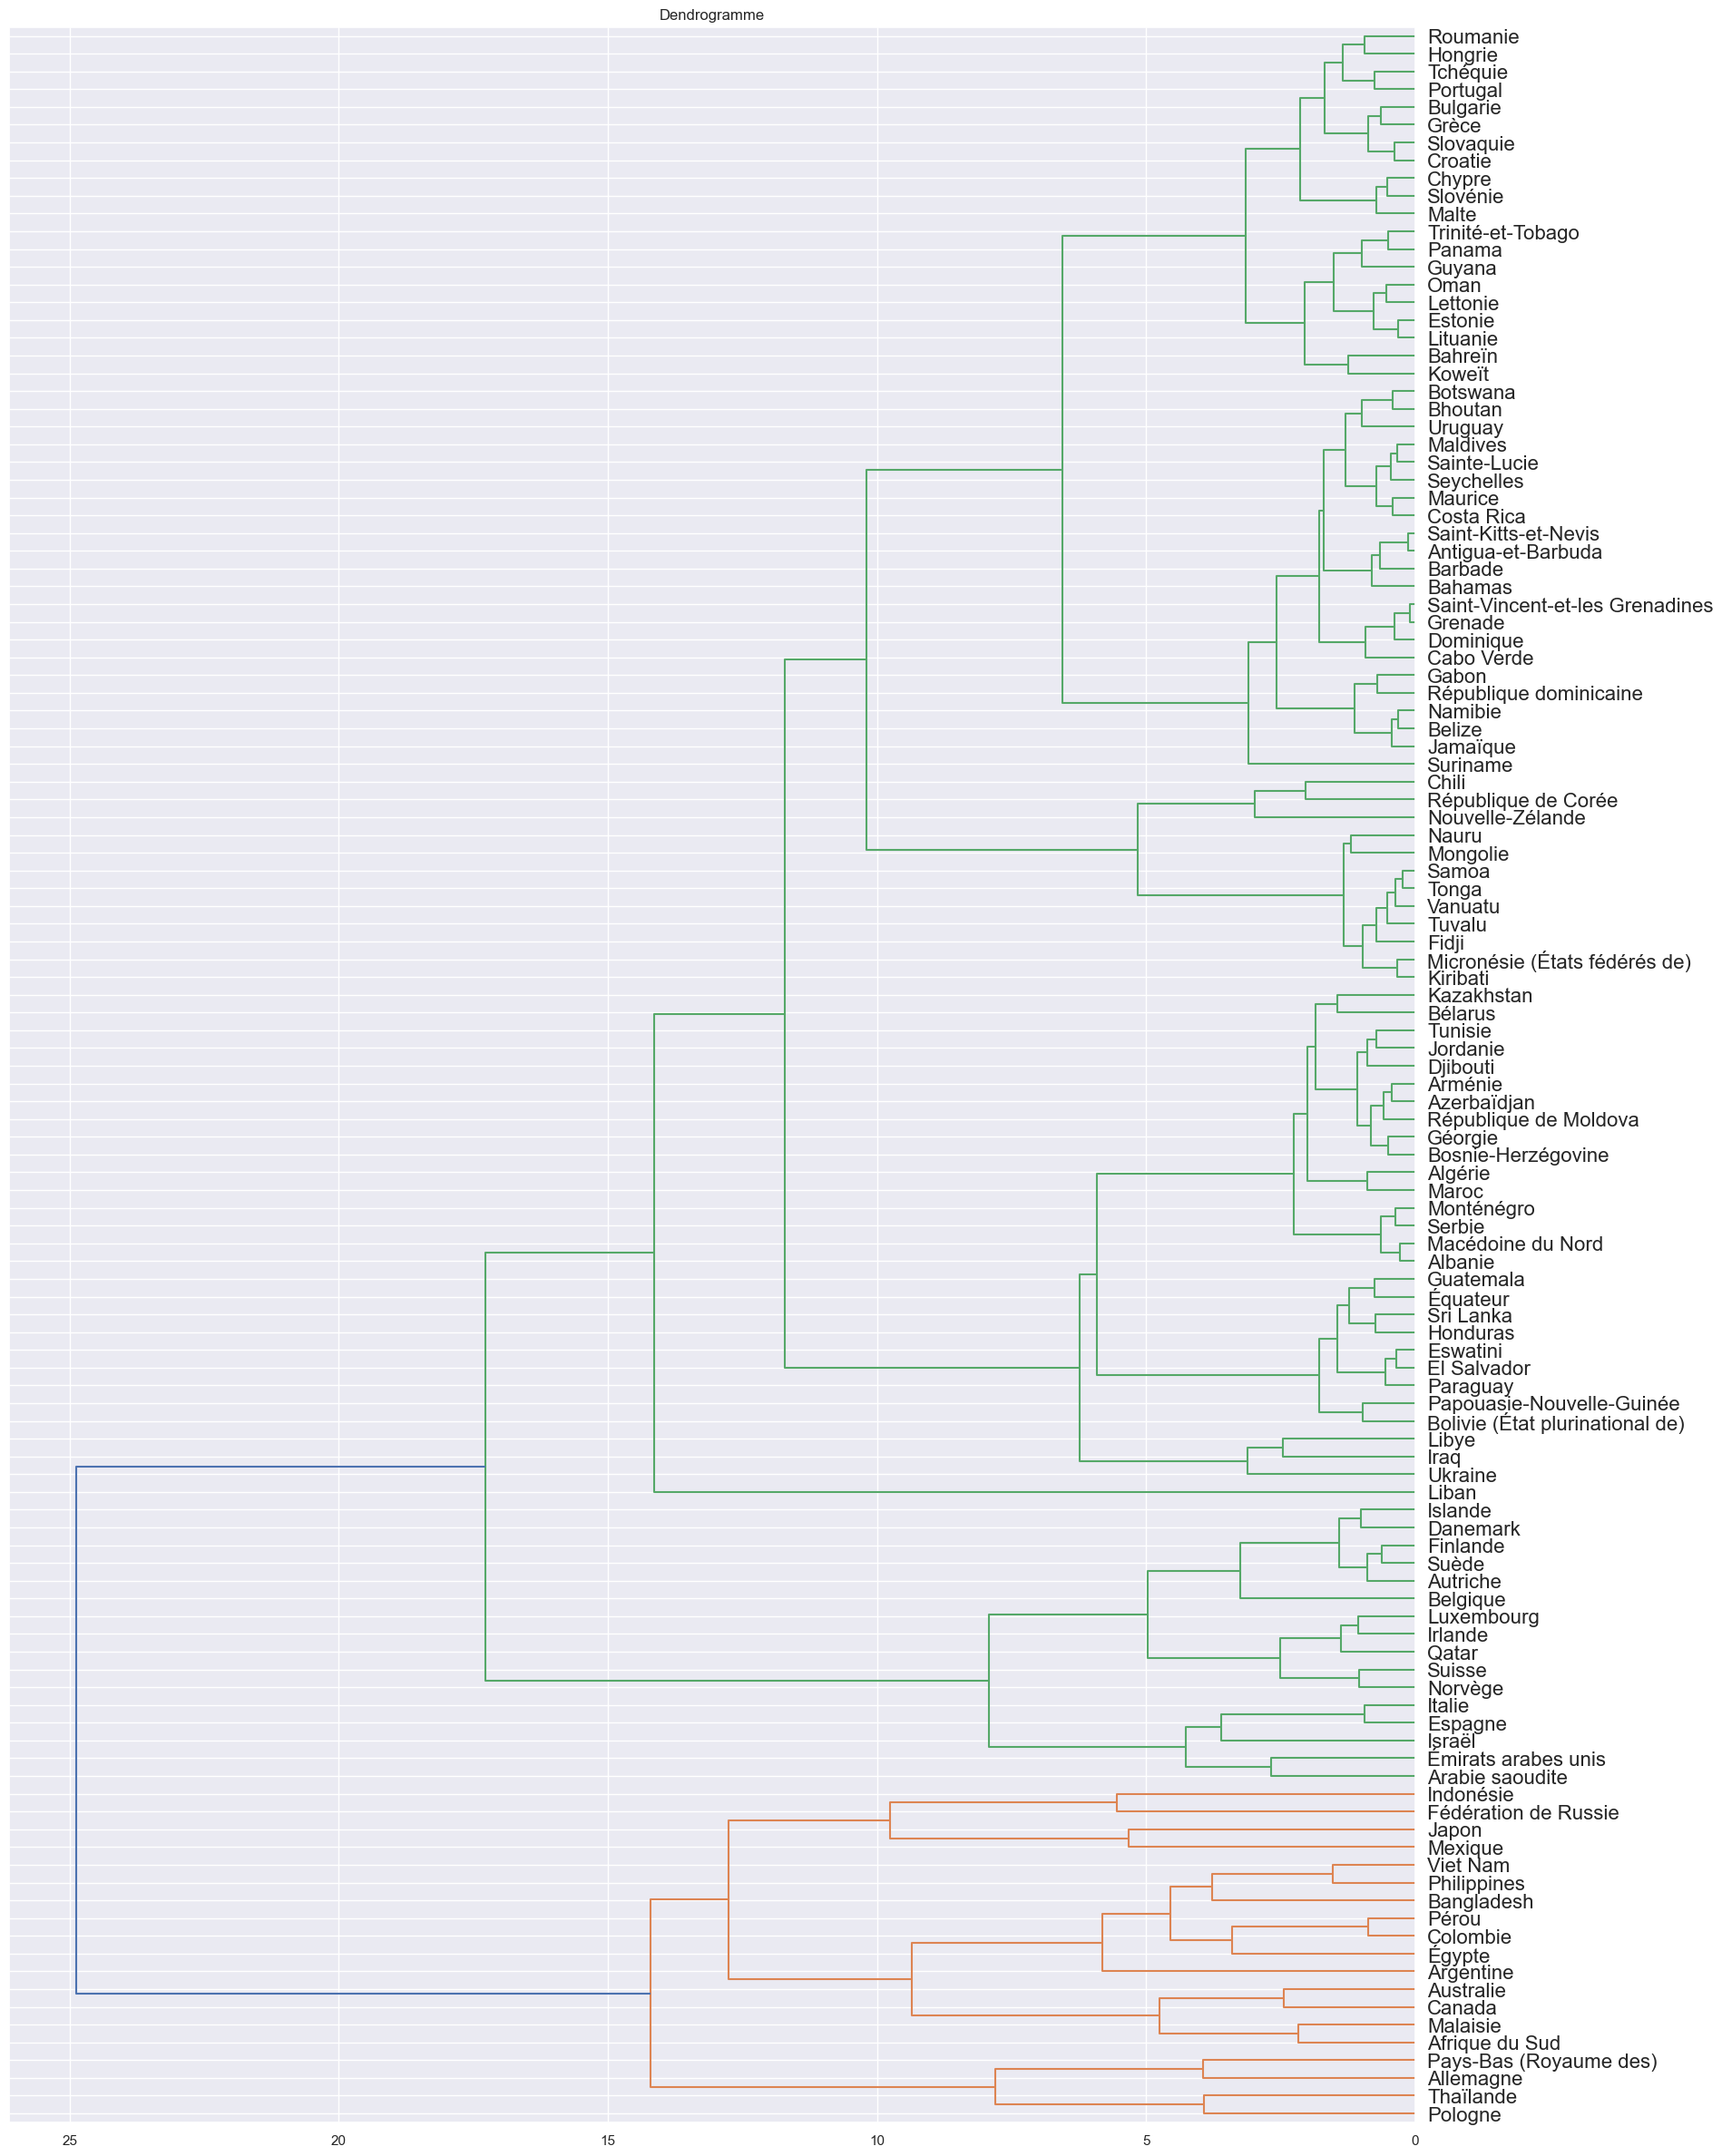

In [33]:
def plot_dendrogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(20, 30))
    dn = dendrogram(Z, ax=ax, labels=names, orientation="left", leaf_font_size=16)
    plt.title("Dendrogramme")
    plt.show()

plot_dendrogram(Z, Pays)

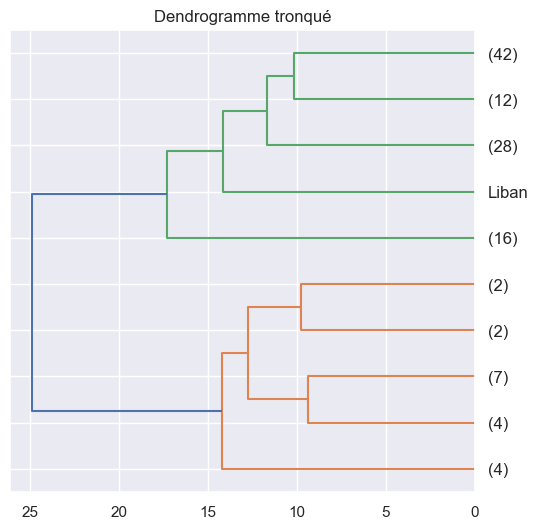

In [34]:
# Dendrogramme tronqué
fig, ax = plt.subplots(figsize=(6, 6))
dn = dendrogram(Z, ax=ax, labels=Pays, orientation="left", truncate_mode='lastp', p=10)
plt.title("Dendrogramme tronqué")
plt.show()

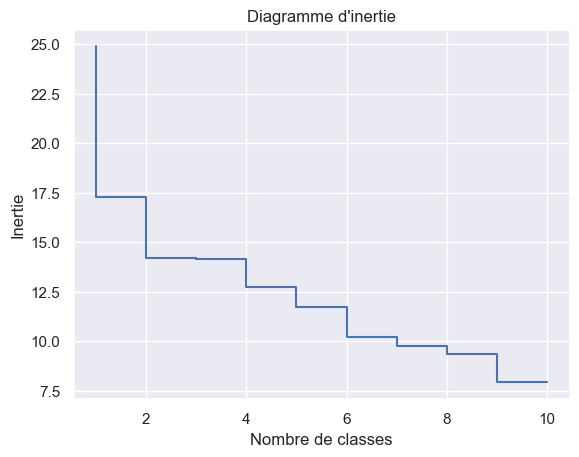

In [35]:
# Diagramme d'inertie pour définir le nombre optimal de clusters
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.step(idxs, last_rev)
plt.title("Diagramme d'inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")
plt.show()

> Nous pouvons observer une forte diminution de l'inertie intra-cluster à 2 clusters. Ensuite, la diminution est moins marquée.

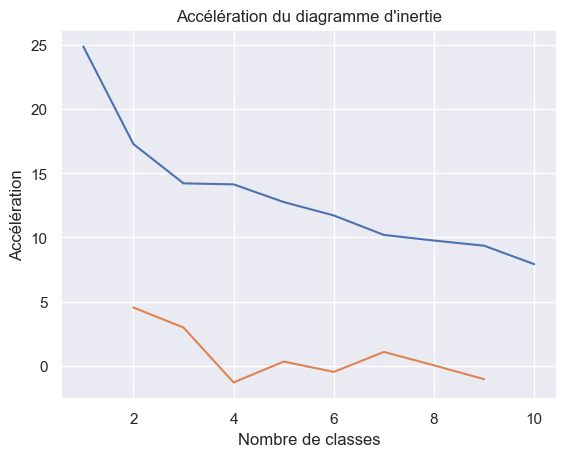

In [36]:
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title("Accélération du diagramme d'inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Accélération")
plt.show()

In [37]:
k = acceleration_rev.argmax() + 2
print(f"Le nombre optimal de classe est {k}.")

Le nombre optimal de classe est 2.


In [38]:
# Découpage en clusters
classes = fcluster(Z, k, criterion='maxclust')

In [39]:
# Création d'un DataFrame avec les clusters
df_classes = pd.DataFrame(classes, index=Pays, columns=['Classe'])

In [40]:
# Nombre de pays par cluster
df_classes['Classe'].value_counts()

Classe
2    99
1    19
Name: count, dtype: int64

In [41]:
# Dataframe des pays de la classe 1
df_classe_1 = df_classes[df_classes['Classe'] == 1]

### 3.2 - Projection des individus avec clusters

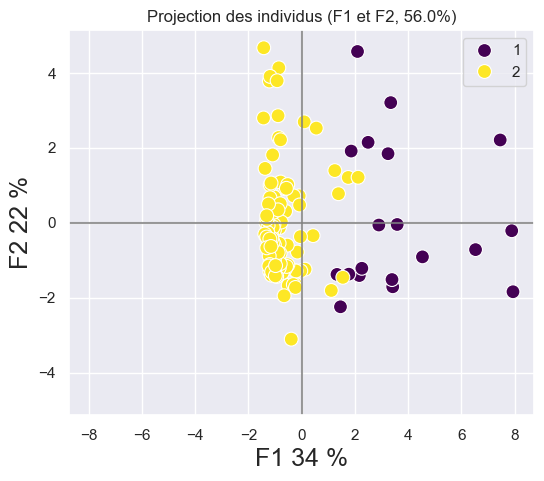

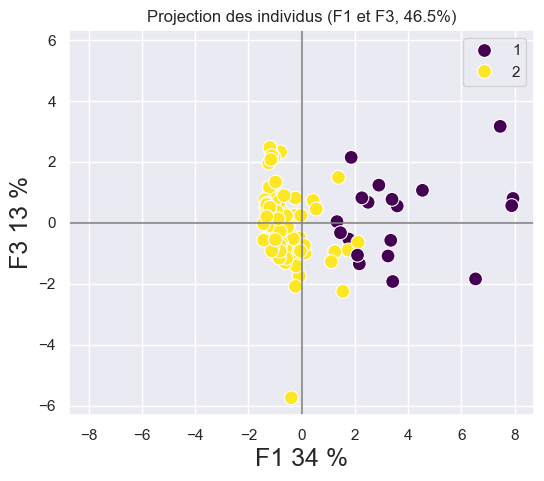

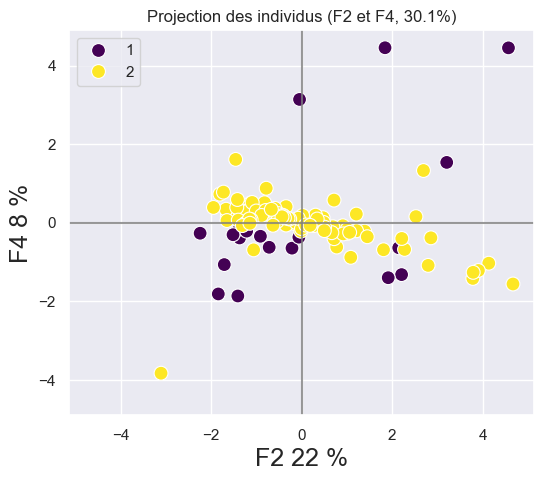

In [42]:
X_proj = pca.transform(X_scaled)

display_factorial_planes(X_proj, (0,1), pca=pca, clusters=classes, figsize=(6,5), marker="o")
display_factorial_planes(X_proj, (0,2), pca=pca, clusters=classes, figsize=(6,5), marker="o")
display_factorial_planes(X_proj, (1,3), pca=pca, clusters=classes, figsize=(6,5), marker="o")

### 3.3 - Etude des classes

In [43]:
df_scaled = pd.DataFrame(X_scaled, index=Pays, columns=Indicateurs)
df_scaled.head()

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,
Fédération de Russie,3.227482,0.831388,-0.235523,4.811276,5.345360,-1.469625,-0.099476,0.306217,-0.353931,-0.400030,-0.743073
Indonésie,6.369662,-0.318266,-0.492991,3.863063,3.983720,-0.854357,-0.236433,-0.754805,-0.731075,3.139723,0.839456
Mexique,2.723873,-0.287074,5.240626,4.808029,3.669154,-1.174809,-0.152301,-0.387541,-0.449013,1.619016,0.853411
Pologne,0.449266,6.419239,-0.106789,0.724002,2.484250,0.350542,0.119453,0.499098,-0.067319,1.218289,-0.455446
Égypte,2.008341,-0.309354,-0.393965,2.309769,2.364203,-1.610624,1.131839,-0.639887,-0.752912,0.442524,-1.034576


In [44]:
df_scaled_classes = pd.concat([df_scaled, df_classes], axis=1)
df_scaled_classes.head()

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance,Classe
Pays,,,,,,,,,,,,
Fédération de Russie,3.227482,0.831388,-0.235523,4.811276,5.345360,-1.469625,-0.099476,0.306217,-0.353931,-0.400030,-0.743073,1
Indonésie,6.369662,-0.318266,-0.492991,3.863063,3.983720,-0.854357,-0.236433,-0.754805,-0.731075,3.139723,0.839456,1
Mexique,2.723873,-0.287074,5.240626,4.808029,3.669154,-1.174809,-0.152301,-0.387541,-0.449013,1.619016,0.853411,1
Pologne,0.449266,6.419239,-0.106789,0.724002,2.484250,0.350542,0.119453,0.499098,-0.067319,1.218289,-0.455446,1
Égypte,2.008341,-0.309354,-0.393965,2.309769,2.364203,-1.610624,1.131839,-0.639887,-0.752912,0.442524,-1.034576,1


In [45]:
# Moyenne de chaque classe
df_scaled_classes_mean = df_scaled_classes.groupby('Classe').mean()
df_scaled_classes_mean.head()

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Classe,,,,,,,,,,,
1,1.660575,0.934111,0.982499,1.720640,1.829727,-0.450251,0.135380,-0.031620,-0.019263,1.528974,0.448198
2,-0.318696,-0.179274,-0.188560,-0.330224,-0.351160,0.086412,-0.025982,0.006068,0.003697,-0.293440,-0.086018


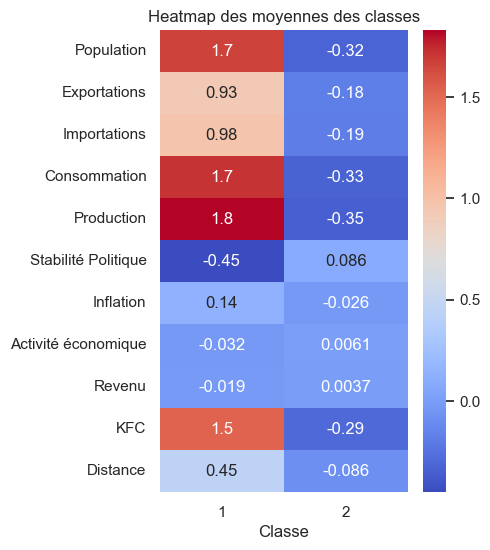

In [46]:
# Heatmap des moyennes des classes
plt.figure(figsize=(4,6))
sns.heatmap(df_scaled_classes_mean.T, annot=True, cmap='coolwarm')
plt.title("Heatmap des moyennes des classes")
plt.show()

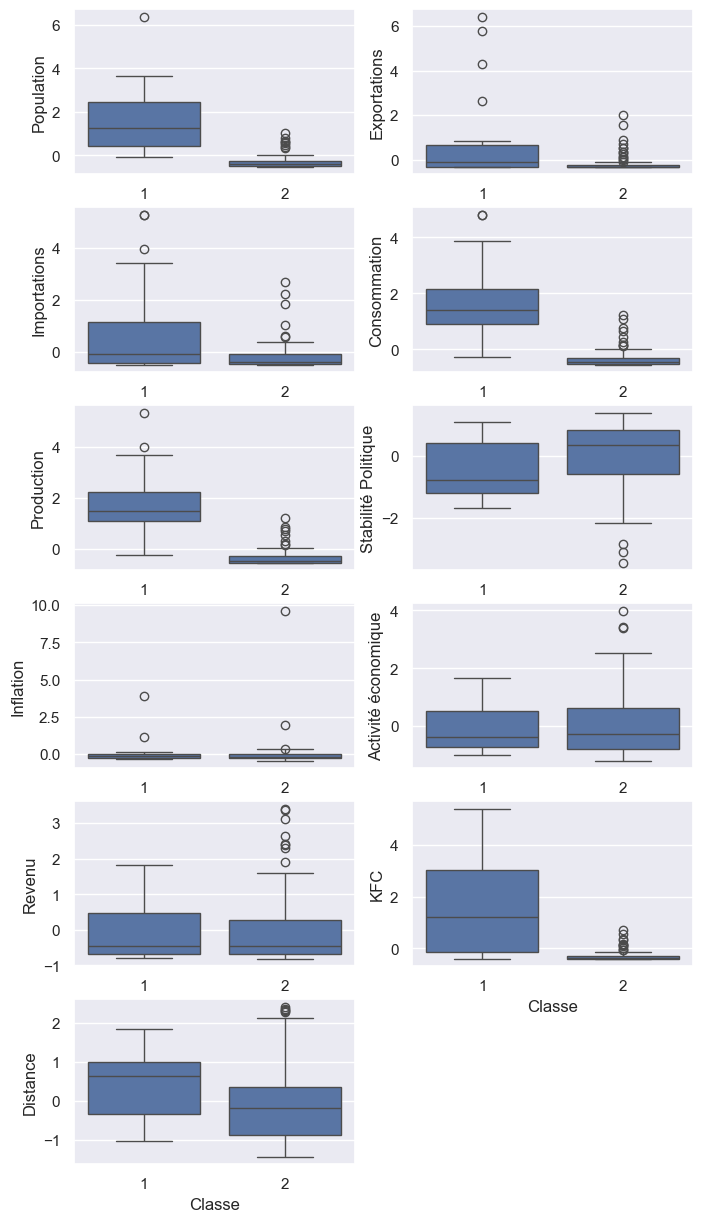

In [47]:
# Distribution des classes
fig, ax = plt.subplots(6, 2, figsize=(8, 15))

for i in range(6):
    for j in range(2):
        index = i*2+j
        if index < 11:
            sns.boxplot(x='Classe', y=Indicateurs[index], data=df_scaled_classes, ax=ax[i, j])

ax[-1, -1].remove()
plt.show()

> A partir de ces résultats, nous pouvons retenir la **classe 1**.

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 4 - K-Means

***

Le K-Means est un algorithme d'apprentissage non supervisé utilisé dans le partitionnement de données, qui regroupe les points de données non étiquetés en clusters.
Il s'agit d'un algorithme itératif qui cherche à minimiser la distance entre les points et le centre de leur cluster, ou centroïde.

### 4.1 - Détermination du nombre optimal de clusters

In [48]:
# Méthode du coude
inertias = []
k_list = list(range(1, 11))

for k in k_list:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

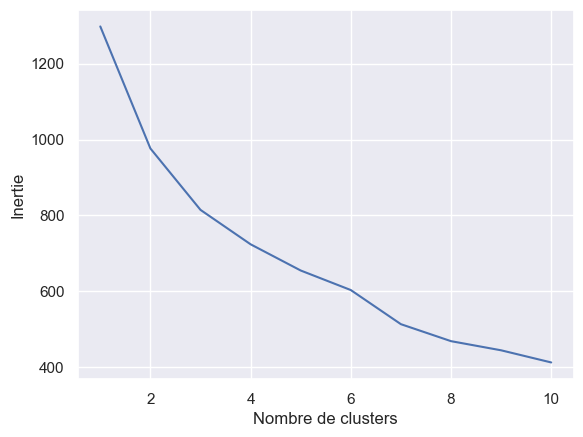

In [49]:
plt.plot(k_list, inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

> Rien de vraiment significatif avec la méthode du coude.

In [50]:
# Coefficient de silhouette
silhouette = []
k_list = list(range(2, 11))

for k in k_list:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, km.labels_))

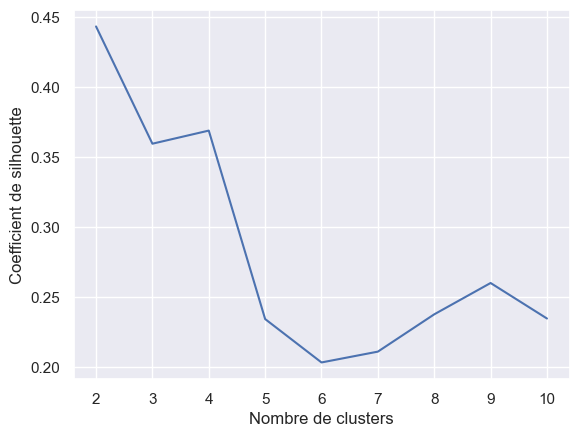

In [51]:
plt.plot(k_list, silhouette)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()

Le coefficient de silhouette le plus haut se retrouve aussi avec 2 clusters.

In [52]:
k = 2

### 4.2 - Projection des clusters

In [53]:
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

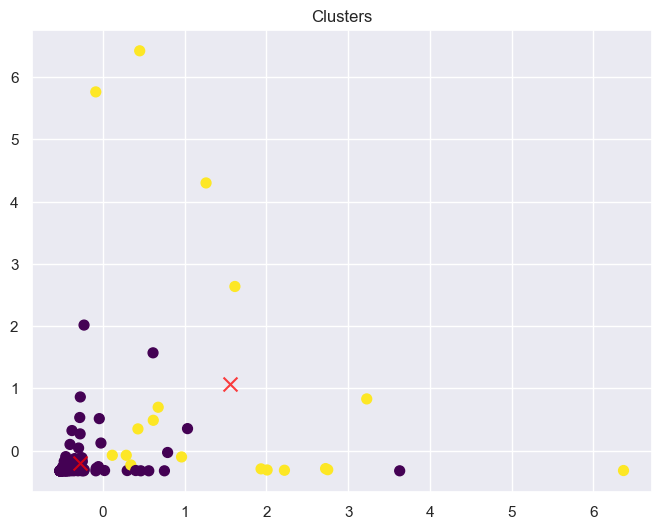

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, alpha=0.75, marker='x');
plt.title('Clusters');
plt.show()

### 4.3 - Etude des clusters

In [55]:
df_kmeans_scaled = pd.DataFrame(X_scaled, index=Pays, columns=Indicateurs)

In [56]:
# Regroupement des clusters modifiés
df_kmeans_clusters = pd.concat([df_kmeans_scaled, pd.DataFrame(y_pred, index=Pays, columns=['Cluster'])], axis=1)
df_kmeans_clusters.head()

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance,Cluster
Pays,,,,,,,,,,,,
Fédération de Russie,3.227482,0.831388,-0.235523,4.811276,5.345360,-1.469625,-0.099476,0.306217,-0.353931,-0.400030,-0.743073,1
Indonésie,6.369662,-0.318266,-0.492991,3.863063,3.983720,-0.854357,-0.236433,-0.754805,-0.731075,3.139723,0.839456,1
Mexique,2.723873,-0.287074,5.240626,4.808029,3.669154,-1.174809,-0.152301,-0.387541,-0.449013,1.619016,0.853411,1
Pologne,0.449266,6.419239,-0.106789,0.724002,2.484250,0.350542,0.119453,0.499098,-0.067319,1.218289,-0.455446,1
Égypte,2.008341,-0.309354,-0.393965,2.309769,2.364203,-1.610624,1.131839,-0.639887,-0.752912,0.442524,-1.034576,1


In [57]:
df_kmeans_clusters['Cluster'].value_counts()

Cluster
0    100
1     18
Name: count, dtype: int64

In [58]:
# Moyenne de chaque cluster
df_kmeans_clusters_mean = df_kmeans_clusters.groupby('Cluster').mean()

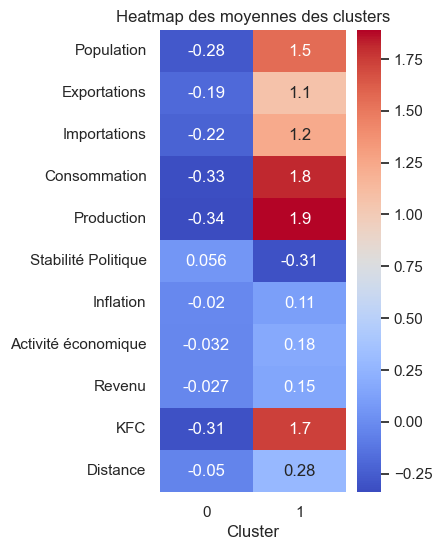

In [59]:
# Heatmap des moyennes des clusters
plt.figure(figsize=(3,6))
sns.heatmap(df_kmeans_clusters_mean.T, annot=True, cmap='coolwarm')
plt.title("Heatmap des moyennes des clusters")
plt.show()

> C'est le cluster #1 qui nous intéresse ici.

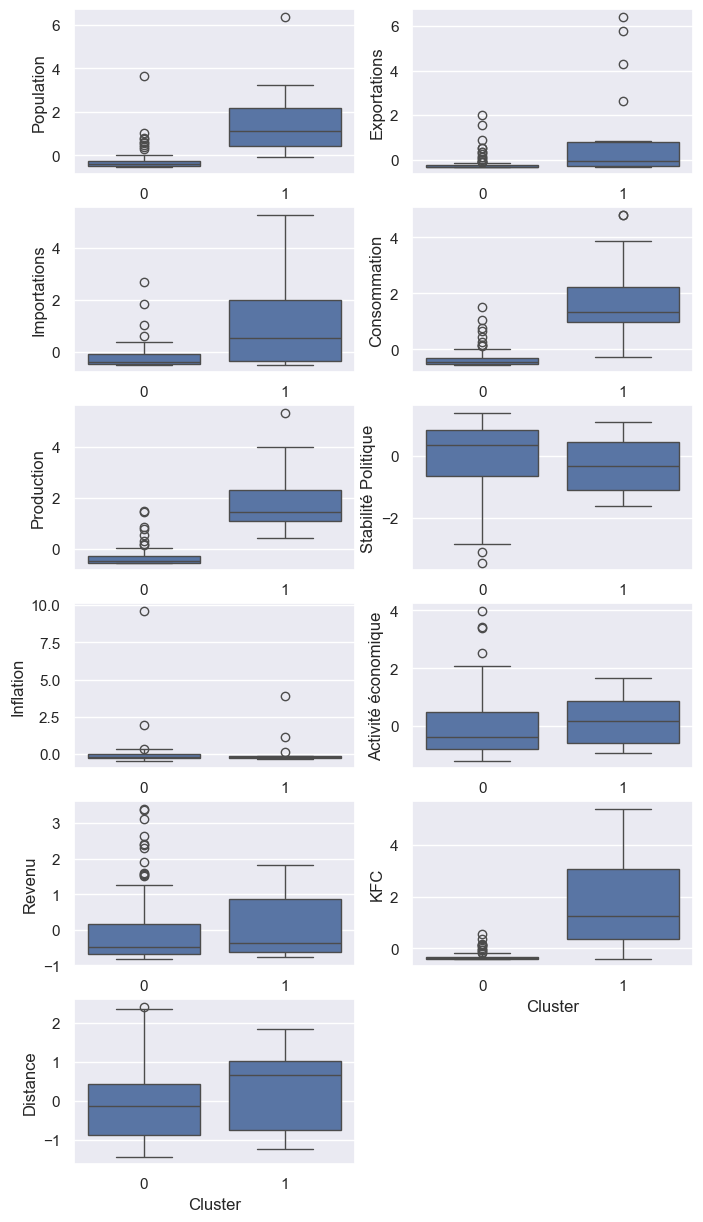

In [60]:
# Distribution des clusters
fig, ax = plt.subplots(6, 2, figsize=(8, 15))

for i in range(6):
    for j in range(2):
        if i == 5 and j == 1:
            break
        else:
            sns.boxplot(x='Cluster', y=Indicateurs[i*2+j], data=df_kmeans_clusters, ax=ax[i, j])

ax[-1, -1].remove()
plt.show()

In [61]:
df_cluster_1 = df_kmeans_clusters[df_kmeans_clusters['Cluster'] == 1]
df_cluster_1

,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance,Cluster
Pays,,,,,,,,,,,,
Fédération de Russie,3.227482,0.831388,-0.235523,4.811276,5.345360,-1.469625,-0.099476,0.306217,-0.353931,-0.400030,-0.743073,1
Indonésie,6.369662,-0.318266,-0.492991,3.863063,3.983720,-0.854357,-0.236433,-0.754805,-0.731075,3.139723,0.839456,1
Mexique,2.723873,-0.287074,5.240626,4.808029,3.669154,-1.174809,-0.152301,-0.387541,-0.449013,1.619016,0.853411,1
Pologne,0.449266,6.419239,-0.106789,0.724002,2.484250,0.350542,0.119453,0.499098,-0.067319,1.218289,-0.455446,1
Égypte,2.008341,-0.309354,-0.393965,2.309769,2.364203,-1.610624,1.131839,-0.639887,-0.752912,0.442524,-1.034576,1
Japon,2.749936,-0.304898,5.265383,3.193036,2.081872,1.081172,-0.254637,0.527472,0.999058,5.410508,1.762033,1
Argentine,0.615206,0.488274,-0.423673,1.823756,2.069645,-0.303180,3.890386,-0.212672,-0.398970,-0.400030,1.130572,1
Afrique du Sud,0.961319,-0.099921,1.012207,2.015347,1.621693,-1.213264,-0.127578,-0.762989,-0.639633,4.506304,0.687890,1
Thaïlande,1.261165,4.298173,-0.483088,0.315924,1.571674,-0.777449,-0.347023,-0.457269,-0.607787,3.283573,1.032306,1


<img src="../gfx/sep.jpg" alt="Barre">

## Etape 5 - Pays candidats

***

### 5.1 - Pays du cluster sélectionné

In [62]:
# Pays sélectionnés par le K-means
sel_pays_kmeans = df_cluster_1.index.values
print("Nombre de pays sélectionnés par le K-Means : {}".format(len(sel_pays_kmeans)))
sel_pays_kmeans

Nombre de pays sélectionnés par le K-Means : 18


array(['Fédération de Russie', 'Indonésie', 'Mexique', 'Pologne',
       'Égypte', 'Japon', 'Argentine', 'Afrique du Sud', 'Thaïlande',
       'Malaisie', 'Espagne', 'Canada', 'Allemagne', 'Philippines',
       'Australie', 'Viet Nam', 'Arabie saoudite',
       'Pays-Bas (Royaume des)'], dtype=object)

In [63]:
# Pays sélectionnés par la classification ascendante hiérarchique
sel_pays_cah = df_classe_1.index.values
print("Nombre de pays sélectionnés par la classication ascendante hiérarchique : {}".format(len(sel_pays_cah)))
sel_pays_cah

Nombre de pays sélectionnés par la classication ascendante hiérarchique : 19


array(['Fédération de Russie', 'Indonésie', 'Mexique', 'Pologne',
       'Égypte', 'Japon', 'Argentine', 'Afrique du Sud', 'Thaïlande',
       'Colombie', 'Pérou', 'Malaisie', 'Canada', 'Allemagne',
       'Philippines', 'Australie', 'Viet Nam', 'Pays-Bas (Royaume des)',
       'Bangladesh'], dtype=object)

In [64]:
# L'ensembles des pays sélectionnés
sel_pays = pd.concat([pd.Series(sel_pays_kmeans), pd.Series(sel_pays_cah)]).unique()
print("Nombre de pays sélectionnés par les 2 algorithmes : {}".format(len(sel_pays)))
sel_pays

Nombre de pays sélectionnés par les 2 algorithmes : 21


array(['Fédération de Russie', 'Indonésie', 'Mexique', 'Pologne',
       'Égypte', 'Japon', 'Argentine', 'Afrique du Sud', 'Thaïlande',
       'Malaisie', 'Espagne', 'Canada', 'Allemagne', 'Philippines',
       'Australie', 'Viet Nam', 'Arabie saoudite',
       'Pays-Bas (Royaume des)', 'Colombie', 'Pérou', 'Bangladesh'],
      dtype=object)

In [65]:
df_sel = df.loc[sel_pays]
df_sel

,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,,,
Fédération de Russie,Europe,Eastern Europe,145734038.0,259000.0,52000.0,4953000.0,5308000.0,-0.92,6.694459,44120.144531,12810.0,0.0,3530.0
Indonésie,Asia,South-eastern Asia,267670543.0,1000.0,0.0,4077000.0,4083000.0,-0.44,3.670131,15415.605793,4520.0,689.0,11695.0
Mexique,Americas,Latin America and the Caribbean,126190788.0,8000.0,1158000.0,4950000.0,3800000.0,-0.69,5.527961,25351.440407,10720.0,393.0,11767.0
Pologne,Europe,Eastern Europe,37921592.0,1513000.0,78000.0,1177000.0,2734000.0,0.50,11.528913,49338.284441,19110.0,315.0,5014.0
Égypte,Africa,Northern Africa,98423598.0,3000.0,20000.0,2642000.0,2626000.0,-1.03,33.884776,18524.557220,4040.0,164.0,2026.0
Japon,Asia,Eastern Asia,127202192.0,4000.0,1163000.0,3458000.0,2372000.0,1.07,3.268134,50105.904361,42550.0,1131.0,16455.0
Argentine,Americas,Latin America and the Caribbean,44361150.0,182000.0,14000.0,2193000.0,2361000.0,-0.01,94.800000,30082.304525,11820.0,0.0,13197.0
Afrique du Sud,Africa,Sub-Saharan Africa,57792518.0,50000.0,304000.0,2370000.0,1958000.0,-0.72,6.073909,15194.199176,6530.0,955.0,10913.0
Thaïlande,Asia,South-eastern Asia,69428453.0,1037000.0,2000.0,800000.0,1913000.0,-0.38,1.228026,23465.063135,7230.0,717.0,12690.0


In [66]:
# Nombre de pays par région
df_sel['Region'].value_counts()

Region
Asia        8
Europe      5
Americas    5
Africa      2
Oceania     1
Name: count, dtype: int64

In [67]:
# Nombre de pays par sous-région
df_sel['Sub-region'].value_counts()

Sub-region
South-eastern Asia                 5
Latin America and the Caribbean    4
Eastern Europe                     2
Western Europe                     2
Northern Africa                    1
Eastern Asia                       1
Sub-Saharan Africa                 1
Southern Europe                    1
Northern America                   1
Australia and New Zealand          1
Western Asia                       1
Southern Asia                      1
Name: count, dtype: int64

### 5.2 - Europe

In [68]:
# Observation des pays de la région Europe
df_sel[df_sel['Region'] == 'Europe']

,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,,,
Fédération de Russie,Europe,Eastern Europe,145734038.0,259000.0,52000.0,4953000.0,5308000.0,-0.92,6.694459,44120.144531,12810.0,0.0,3530.0
Pologne,Europe,Eastern Europe,37921592.0,1513000.0,78000.0,1177000.0,2734000.0,0.50,11.528913,49338.284441,19110.0,315.0,5014.0
Espagne,Europe,Southern Europe,46692858.0,229000.0,212000.0,1527000.0,1585000.0,0.27,3.532361,54123.111397,32000.0,143.0,1070.0
Allemagne,Europe,Western Europe,83124418.0,664000.0,789000.0,1376000.0,1507000.0,0.61,5.946437,71438.289661,53800.0,189.0,3770.0
Pays-Bas (Royaume des),Europe,Western Europe,17059560.0,1365000.0,897000.0,242000.0,876000.0,0.72,3.838394,80760.595626,60030.0,77.0,3456.0


En dehors de la Russie pour des raisons politiques, nous pouvons nous concentrer sur les pays ci-dessus dans un premier temps.

Soit :
- Allemagne
- Pays-Bas
- Pologne
- Espagne

Puisse qu'ils sont proche de la France, et de plus dans l'espace Schengen, ces pays sont les candidats parfaits pour un premier test de commercialisation à l'étranger.

### 5.3 - Asie

In [69]:
# Observation des pays de la région Asie
df_sel[df_sel['Region'] == 'Asia']

,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,,,
Indonésie,Asia,South-eastern Asia,267670543.0,1000.0,0.0,4077000.0,4083000.0,-0.44,3.670131,15415.605793,4520.0,689.0,11695.0
Japon,Asia,Eastern Asia,127202192.0,4000.0,1163000.0,3458000.0,2372000.0,1.07,3.268134,50105.904361,42550.0,1131.0,16455.0
Thaïlande,Asia,South-eastern Asia,69428453.0,1037000.0,2000.0,800000.0,1913000.0,-0.38,1.228026,23465.063135,7230.0,717.0,12690.0
Malaisie,Asia,South-eastern Asia,31528033.0,56000.0,177000.0,1801000.0,1678000.0,0.14,2.488866,36416.540185,11610.0,718.0,10657.0
Philippines,Asia,South-eastern Asia,106651394.0,2000.0,360000.0,1818000.0,1459000.0,-0.71,5.978025,10988.630041,4010.0,332.0,13612.0
Viet Nam,Asia,South-eastern Asia,95545962.0,7000.0,270000.0,1468000.0,1249000.0,-0.03,3.252893,14973.883961,3960.0,136.0,12350.0
Arabie saoudite,Asia,Western Asia,33702756.0,21000.0,551000.0,1659000.0,1130000.0,-0.36,2.327085,61102.915372,31120.0,220.0,3365.0
Bangladesh,Asia,Southern Asia,161376708.0,0.0,0.0,284000.0,284000.0,-1.09,9.883503,9147.777507,2850.0,26.0,10613.0


Pour la zone Asie, quelques observations :
- L'Indonésie est gros producteur de volaille, avec aucune importation et peu d'exportation. Il y a trop de concurrence et sûrement peu de marché pour du poulet haut de gamme.
- D'un autre côté, le Japon est un bon candidat. Gros consommateurs, avec de forte importation, et une implantation de 1131 restaurants KFC. Ils ont également de haut niveau de revenu et un attrait pour tout ce qui est français. 
- Tous les autres pays semblent intéressants.
- A noter qu'il faudrait une viande halal pour l'Indonésie, la Malaisie, l'Arabie Saoudite, le Bangladesh. Ce qui demanderait une organisation plus complexe, qu'il serait possible d'étudier dans un second temps.

### 5.4 - Amérique

In [70]:
# Observation des pays de la région Amérique
df_sel[df_sel['Region'] == 'Americas']

,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,,,
Mexique,Americas,Latin America and the Caribbean,126190788.0,8000.0,1158000.0,4950000.0,3800000.0,-0.69,5.527961,25351.440407,10720.0,393.0,11767.0
Argentine,Americas,Latin America and the Caribbean,44361150.0,182000.0,14000.0,2193000.0,2361000.0,-0.01,94.800000,30082.304525,11820.0,0.0,13197.0
Canada,Americas,Northern America,37074562.0,151000.0,206000.0,1583000.0,1531000.0,0.77,3.879002,61650.989867,53300.0,639.0,6159.0
Colombie,Americas,Latin America and the Caribbean,49661048.0,0.0,81000.0,1901000.0,1820000.0,-0.64,11.735904,21448.092568,6640.0,0.0,8355.0
Pérou,Americas,Latin America and the Caribbean,31989260.0,1000.0,87000.0,1479000.0,1802000.0,-0.45,6.455613,16974.242003,6920.0,0.0,10735.0


Ces pays sont de bons candidats en Amérique :

- Mexique
- Argentine
- Canada
- Colombie
- Pérou

### 5.5 - Afrique

In [71]:
# Observation des pays de la région Afrique
df_sel[df_sel['Region'] == 'Africa']

,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,,,
Égypte,Africa,Northern Africa,98423598.0,3000.0,20000.0,2642000.0,2626000.0,-1.03,33.884776,18524.557220,4040.0,164.0,2026.0
Afrique du Sud,Africa,Sub-Saharan Africa,57792518.0,50000.0,304000.0,2370000.0,1958000.0,-0.72,6.073909,15194.199176,6530.0,955.0,10913.0


Voici les pays candidats pour le continent Africain :

- Egypte, il faudrait une viande halal
- Afrique du Sud

### 5.6 - Océanie

In [72]:
# Observation des pays de la région Océanie
df_sel[df_sel['Region'] == 'Oceania']

,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
Pays,,,,,,,,,,,,,
Australie,Oceania,Australia and New Zealand,24898152.0,56000.0,4000.0,1285000.0,1397000.0,0.93,5.597015,69231.31036,60710.0,653.0,16856.0


Seul pays candidat pour l'Océanie : 

- Australie

### 5.7 - Conclusion

> Nous avons pu faire une sélection d'une vingtaine de pays, répartis sur les 5 continents.

> Il serait judicieux de commencer par tester la commercialisation et la logistique dans les pays sélectionnés en Europe, pour plus tard s'étendre sur les autres continents.

> Tous ces pays, répondent à nos critères de sélection qui tiennent compte de l'appétence de la population pour la viande de volaille, de leur niveau de revenu, et des conditions nécessaires (stabilité politique, distance) pour une bonne distribution.